<a href="https://colab.research.google.com/github/Anatoly333/Dogs_Babesiosis_Diagnostics/blob/main/Data_generation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Библиотека для работы с матрицами
import numpy as np 
# Алгоритмы линейной алгебры
import scipy.linalg as sla
import math
import pandas as pd
import random
import seaborn as sns


In [ ]:
# Библиотека для работы с матрицами
import numpy as np 
# Алгоритмы линейной алгебры
import scipy.linalg as sla
import math
import pandas as pd
import random

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn import svm 
from sklearn.svm import SVC
from sklearn import tree
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
import lightgbm as lgb
import matplotlib.pyplot as plt
from sklearn.linear_model import RidgeCV
from sklearn import linear_model
from sklearn.preprocessing import MinMaxScaler
from sklearn.utils import shuffle
from matplotlib import pyplot

In [ ]:
data = pd.read_excel('data_all_no_emissions.xlsx')

In [ ]:
data_2 = pd.read_excel('data_all_no_emissions.xlsx')

In [ ]:
data_cols = list(data.columns)
print('Dataset columns: {}'.format(data_cols))

Dataset columns: ['Гемоглобин (Hgb)', 'Эритроциты (RBC)', 'Лейкоциты (WBC)', 'Палочкоядерные нейтрофилы (Bands)', 'Сегментоядерные нейтрофилы (Segs)', 'Моноциты (Mono)', 'Тромбоциты (Plt)', 'Средний объем эритроцита (MCV)', 'Болен или нет']


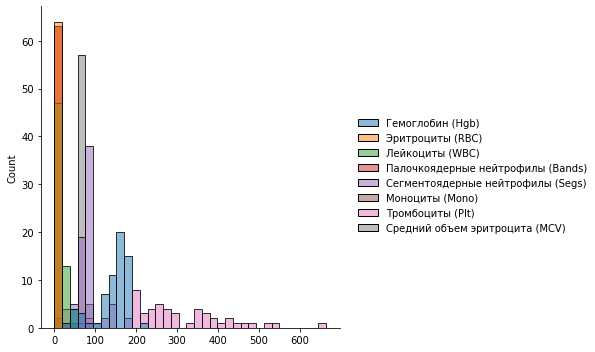

In [ ]:
only_sick = data[(data['Болен или нет'] == 1)] #все больные собаки
only_health = data[(data['Болен или нет'] == 0)] #вса здоровые собаки

y_sick = only_sick['Болен или нет'] 
x_sick = only_sick.drop(columns=['Болен или нет'])

y_health = only_health['Болен или нет']
x_health = only_health.drop(columns=['Болен или нет'])

sns.displot(x_health)
#sns.dsplot(x_sick)

In [ ]:
only_sick_1 = x_health.iloc[0]


In [ ]:
pip install -U distfit

In [ ]:
from distfit import distfit

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Общий

In [ ]:
# Generate test data
data1 = np.random.normal(loc=5.0, scale=10, size=1000)

# Initialize model
dist1 = distfit(bins=25,alpha=0.02,stats='ks')
x_health_n = x_health.to_numpy()
# Fit
dist1.fit_transform(x_health_n,verbose=1)
print(type(data1))

<class 'numpy.ndarray'>


(<Figure size 720x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f64a7194490>)

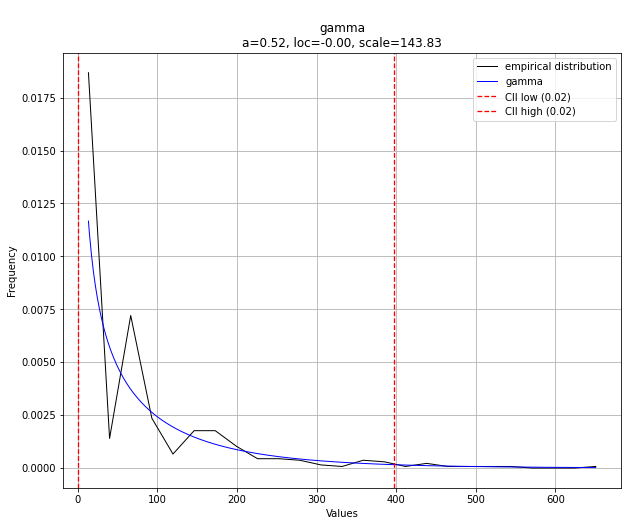

In [ ]:
dist1.plot(verbose=1)

Лейкциты

In [ ]:
names = x_sick.columns
x_health_1 = x_sick['Лейкоциты (WBC)']
print(x_health_1)

# Initialize model
dist1 = distfit(bins=25,alpha=0.02,stats='ks', distr='expon')
print(x_health_1)
# Fit
dist1.fit_transform(x_health_1,verbose=1)
print(type(data1))

print(names)


0      17.6
1       3.4
2       5.8
3       4.7
4       5.2
       ... 
131     4.6
132    25.3
133    11.1
134     5.0
135     6.4
Name: Лейкоциты (WBC), Length: 136, dtype: float64
0      17.6
1       3.4
2       5.8
3       4.7
4       5.2
       ... 
131     4.6
132    25.3
133    11.1
134     5.0
135     6.4
Name: Лейкоциты (WBC), Length: 136, dtype: float64
<class 'numpy.ndarray'>
Index(['Гемоглобин (Hgb)', 'Эритроциты (RBC)', 'Лейкоциты (WBC)',
       'Палочкоядерные нейтрофилы (Bands)',
       'Сегментоядерные нейтрофилы (Segs)', 'Моноциты (Mono)',
       'Тромбоциты (Plt)', 'Средний объем эритроцита (MCV)'],
      dtype='object')


(<Figure size 720x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f72a2fd0610>)

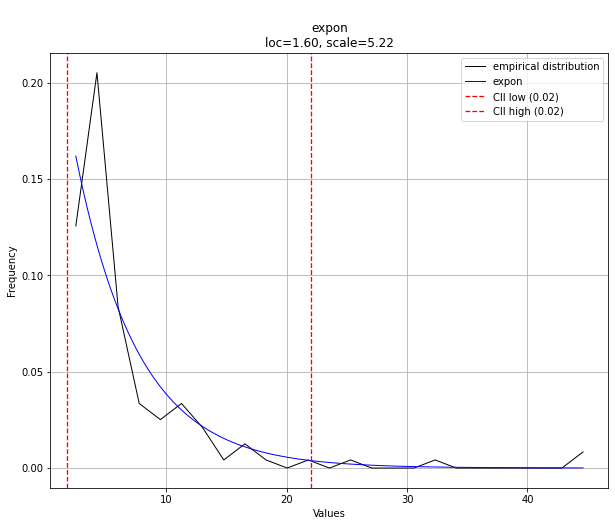

In [ ]:
dist1.plot(verbose=1)

In [ ]:
dist1.summary

,distr,score,LLE,loc,scale,arg
0,expon,1.828622,NaN,1.6,5.221324,()


In [ ]:
df = pd.DataFrame()
data_wbc = dist1.generate(n=100)
df['Лейкоциты (WBC)'] = data_wbc.tolist()
print(df)

[distfit] >Generate 100 expon distributed samples with fitted params (1.6, 5.221323529411764).
    Лейкоциты (WBC)
0          7.117894
1          2.684016
2          2.175805
3         18.869148
4         13.314418
..              ...
95         2.027713
96        13.186083
97         6.797947
98        15.071305
99         5.462288

[100 rows x 1 columns]


Гемоглабин

In [ ]:
names = x_sick.columns
x_health_1 = x_sick['Гемоглобин (Hgb)']
print(x_health_1)

# Initialize model
dist1 = distfit(bins=25,alpha=0.02,stats='ks', distr = 'dweibull')
print(x_health_1)
# Fit
dist1.fit_transform(x_health_1,verbose=1)
print(type(data1))

print(names)


0       95
1      146
2      130
3      105
4      165
      ... 
131     73
132     81
133    102
134    136
135     41
Name: Гемоглобин (Hgb), Length: 136, dtype: int64
0       95
1      146
2      130
3      105
4      165
      ... 
131     73
132     81
133    102
134    136
135     41
Name: Гемоглобин (Hgb), Length: 136, dtype: int64
<class 'numpy.ndarray'>
Index(['Гемоглобин (Hgb)', 'Эритроциты (RBC)', 'Лейкоциты (WBC)',
       'Палочкоядерные нейтрофилы (Bands)',
       'Сегментоядерные нейтрофилы (Segs)', 'Моноциты (Mono)',
       'Тромбоциты (Plt)', 'Средний объем эритроцита (MCV)'],
      dtype='object')


(<Figure size 720x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f72a2f47a90>)

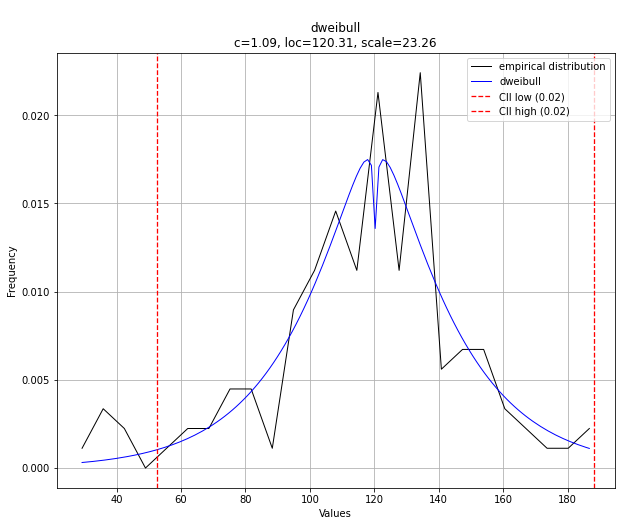

In [ ]:
dist1.plot(verbose=1)

In [ ]:
dist1.summary

,distr,score,LLE,loc,scale,arg
0,dweibull,0.038582,NaN,120.311442,23.2607,"(1.093211317908204,)"


In [ ]:
dist1.generate(n=100)

[distfit] >Generate 100 dweibull distributed samples with fitted params (1.093211317908204, 120.31144179390415, 23.260700168446967).


array([144.90058589, 110.34659504, 100.86838809, 141.1683514 ,
        45.57556925,  66.40753724, 190.81381193, 145.13352987,
       131.13143977, 107.76463246, 109.52715062, 155.80188827,
        55.67245924, 128.15197577, 154.94543516, 140.55394428,
       101.50508182, 145.43795079, 125.42639028, 129.25967257,
       110.5262135 ,  98.6890344 , 100.73579816, 249.13723799,
       119.95588809, 139.86020594, 120.15488137, 160.09467561,
       126.14376371, 117.54948627,  74.35936479,  83.50781044,
        -5.88107314,  94.42617455, 125.71856586,  96.59061719,
       139.12619749, 116.61637465,  93.21254147,  97.48151799,
       165.53190665, 132.91732003, 128.66655369, 143.6448841 ,
       134.88460868, 109.78975332,  88.4760633 , 118.80436947,
       197.75244346, 124.59144616, 151.99597777, 106.93731362,
       130.96964992, 117.75845677, 110.24475252,  98.07619385,
       130.26587295, 160.5968958 , 116.45830036,  84.91367161,
        99.82368865, 172.38245296, 129.8354717 , 116.88

In [ ]:
data_wbc = dist1.generate(n=100)
df['Гемоглобин (Hgb)'] = data_wbc.tolist()
print(df)

[distfit] >Generate 100 dweibull distributed samples with fitted params (1.093211317908204, 120.31144179390415, 23.260700168446967).
    Лейкоциты (WBC)  Гемоглобин (Hgb)
0          7.117894        120.995047
1          2.684016        120.027407
2          2.175805        129.012750
3         18.869148        103.128156
4         13.314418        152.398369
..              ...               ...
95         2.027713        126.238902
96        13.186083        112.478652
97         6.797947        129.240835
98        15.071305        107.008969
99         5.462288        144.319728

[100 rows x 2 columns]


Эритроциты

In [ ]:
names = x_sick.columns
x_health_1 = x_sick['Эритроциты (RBC)']
print(x_health_1)

# Initialize model
dist1 = distfit(bins=25,alpha=0.02,stats='ks', distr = 'dweibull')
print(x_health_1)
# Fit
dist1.fit_transform(x_health_1,verbose=1)
print(type(data1))

print(names)

0      3.63
1      5.67
2      6.04
3      4.42
4      6.42
       ... 
131    3.35
132    3.10
133    4.46
134    5.45
135    1.83
Name: Эритроциты (RBC), Length: 136, dtype: float64
0      3.63
1      5.67
2      6.04
3      4.42
4      6.42
       ... 
131    3.35
132    3.10
133    4.46
134    5.45
135    1.83
Name: Эритроциты (RBC), Length: 136, dtype: float64
<class 'numpy.ndarray'>
Index(['Гемоглобин (Hgb)', 'Эритроциты (RBC)', 'Лейкоциты (WBC)',
       'Палочкоядерные нейтрофилы (Bands)',
       'Сегментоядерные нейтрофилы (Segs)', 'Моноциты (Mono)',
       'Тромбоциты (Plt)', 'Средний объем эритроцита (MCV)'],
      dtype='object')


(<Figure size 720x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f72a2ed5ad0>)

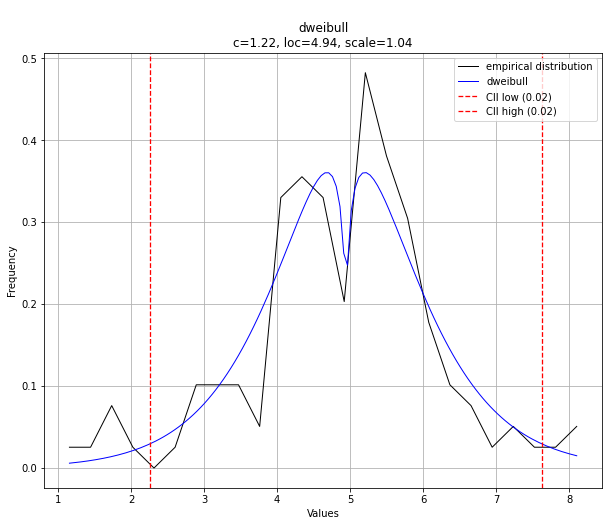

In [ ]:
dist1.plot(verbose=1)

In [ ]:
dist1.summary

,distr,score,LLE,loc,scale,arg
0,dweibull,0.148617,NaN,4.942392,1.035217,"(1.2246346987535612,)"


In [ ]:
dist1.generate(n=100)

[distfit] >Generate 100 dweibull distributed samples with fitted params (1.2246346987535612, 4.942392225966504, 1.0352165613054696).


array([4.63586208, 5.05724816, 6.47006567, 3.6385944 , 7.16477911,
       4.64848364, 6.12002935, 4.01278961, 4.29348183, 5.67858976,
       3.86701767, 6.1328183 , 6.84361164, 3.66376094, 6.00104245,
       4.01490422, 5.64803036, 5.05083321, 4.59241341, 3.7687804 ,
       5.1790498 , 5.76889845, 6.66342292, 6.39236058, 7.76791734,
       6.15402179, 3.62636343, 7.70584842, 5.47722438, 5.80836496,
       5.69923423, 7.00943168, 3.88480152, 4.40816305, 6.52972295,
       4.03894523, 4.9468298 , 5.42035705, 3.90275247, 4.83992259,
       5.83668307, 4.07518071, 5.36801188, 6.56721707, 4.13908127,
       4.71770765, 2.65695558, 3.01655592, 4.05312649, 2.71766857,
       3.40776149, 4.41838356, 5.49191936, 7.58906635, 6.40592646,
       4.99286372, 6.14801473, 5.29935575, 7.15517262, 5.36607625,
       4.99862893, 6.13478159, 3.65987207, 6.43799731, 4.14515587,
       6.73997651, 5.9040073 , 5.59669629, 4.5985507 , 6.34361138,
       4.08057076, 4.28558042, 6.58046714, 6.52926848, 5.01230

In [ ]:
data_wbc = dist1.generate(n=100)
df['Эритроциты (RBC)'] = data_wbc.tolist()
print(df)

[distfit] >Generate 100 dweibull distributed samples with fitted params (1.2246346987535612, 4.942392225966504, 1.0352165613054696).
    Лейкоциты (WBC)  Гемоглобин (Hgb)  Эритроциты (RBC)
0          7.117894        120.995047          3.045004
1          2.684016        120.027407          4.704464
2          2.175805        129.012750          4.437079
3         18.869148        103.128156          6.036878
4         13.314418        152.398369          2.215141
..              ...               ...               ...
95         2.027713        126.238902          4.925600
96        13.186083        112.478652          3.200295
97         6.797947        129.240835          4.415116
98        15.071305        107.008969          4.614045
99         5.462288        144.319728          5.588760

[100 rows x 3 columns]


Палочкодерные нейтрофилы

In [ ]:
names = x_sick.columns
x_health_1 = x_sick['Палочкоядерные нейтрофилы (Bands)']
print(x_health_1)

# Initialize model
dist1 = distfit(bins=25,alpha=0.02,stats='ks', distr = 'pareto')
print(x_health_1)
# Fit
dist1.fit_transform(x_health_1,verbose=1)
print(type(data1))

print(names)

0       5
1       0
2       3
3       1
4       0
       ..
131     2
132    26
133    13
134     2
135     3
Name: Палочкоядерные нейтрофилы (Bands), Length: 136, dtype: int64
0       5
1       0
2       3
3       1
4       0
       ..
131     2
132    26
133    13
134     2
135     3
Name: Палочкоядерные нейтрофилы (Bands), Length: 136, dtype: int64
<class 'numpy.ndarray'>
Index(['Гемоглобин (Hgb)', 'Эритроциты (RBC)', 'Лейкоциты (WBC)',
       'Палочкоядерные нейтрофилы (Bands)',
       'Сегментоядерные нейтрофилы (Segs)', 'Моноциты (Mono)',
       'Тромбоциты (Plt)', 'Средний объем эритроцита (MCV)'],
      dtype='object')


(<Figure size 720x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f72a2e0d850>)

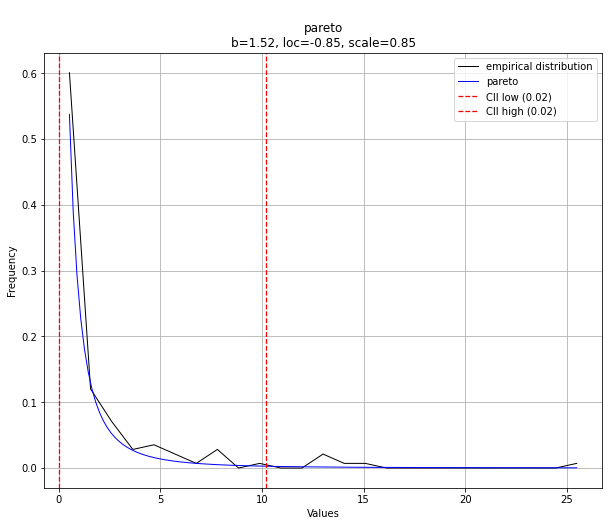

In [ ]:
dist1.plot(verbose=1)

In [ ]:
dist1.summary

,distr,score,LLE,loc,scale,arg
0,pareto,2.250696,NaN,-0.847694,0.847694,"(1.5232372970000498,)"


In [ ]:
dist1.generate(n=100)

[distfit] >Generate 100 pareto distributed samples with fitted params (1.5232372970000498, -0.8476939551579834, 0.847693953377505).


array([2.07385543e+00, 3.53243373e-01, 1.45315793e+00, 3.92043956e-02,
       1.12983592e+00, 2.42723236e+00, 6.03426595e-01, 1.93603644e+00,
       1.63082361e+00, 2.28261626e+00, 3.12210726e+00, 3.23599655e-01,
       1.65124569e-02, 1.61372367e+00, 7.35229113e+00, 4.36514024e-01,
       5.87692227e-02, 1.10056539e+00, 2.36612939e+00, 6.05212208e-01,
       4.96217344e-01, 7.42484855e-01, 1.24798324e+00, 4.62576217e-01,
       1.23861076e+00, 1.98859385e-01, 3.15818617e-01, 3.89912426e-01,
       5.57205863e-01, 1.52902912e+00, 2.46634270e-01, 1.77506040e-01,
       3.27704802e-01, 1.40956438e+00, 4.54823448e-01, 6.45149712e+00,
       7.88506079e+00, 2.89854875e-01, 1.11209089e+00, 4.61385515e-01,
       2.44774464e+00, 2.03902479e-01, 8.30044489e-01, 1.62142200e+00,
       1.14854473e+00, 2.53995903e-01, 1.40698498e+00, 9.90157310e-01,
       1.20218382e+00, 7.03523740e-01, 1.06446191e-01, 2.44005110e-03,
       2.41854608e-01, 2.96104116e-01, 1.69319261e+00, 2.75392175e-01,
      

In [ ]:
data_wbc = dist1.generate(n=100)
df['Палочкоядерные нейтрофилы (Bands)'] = data_wbc.tolist()
print(df)

[distfit] >Generate 100 pareto distributed samples with fitted params (1.5232372970000498, -0.8476939551579834, 0.847693953377505).
    Лейкоциты (WBC)  ...  Палочкоядерные нейтрофилы (Bands)
0          7.117894  ...                           5.174401
1          2.684016  ...                           8.099183
2          2.175805  ...                           1.825724
3         18.869148  ...                           0.485982
4         13.314418  ...                           0.024016
..              ...  ...                                ...
95         2.027713  ...                           0.655709
96        13.186083  ...                           1.676083
97         6.797947  ...                           7.163255
98        15.071305  ...                           0.022746
99         5.462288  ...                           0.421043

[100 rows x 4 columns]


Сегментоядерные нейтрофилы

In [ ]:
names = x_sick.columns
x_health_1 = x_sick['Сегментоядерные нейтрофилы (Segs)']
print(x_health_1)

# Initialize model
dist1 = distfit(bins=25,alpha=0.02,stats='ks',distr = 'dweibull')
print(x_health_1)
# Fit
dist1.fit_transform(x_health_1,verbose=1)
print(type(data1))

print(names)

0      67
1      51
2      64
3      67
4      55
       ..
131    81
132    56
133    67
134    61
135    41
Name: Сегментоядерные нейтрофилы (Segs), Length: 136, dtype: int64
0      67
1      51
2      64
3      67
4      55
       ..
131    81
132    56
133    67
134    61
135    41
Name: Сегментоядерные нейтрофилы (Segs), Length: 136, dtype: int64
<class 'numpy.ndarray'>
Index(['Гемоглобин (Hgb)', 'Эритроциты (RBC)', 'Лейкоциты (WBC)',
       'Палочкоядерные нейтрофилы (Bands)',
       'Сегментоядерные нейтрофилы (Segs)', 'Моноциты (Mono)',
       'Тромбоциты (Plt)', 'Средний объем эритроцита (MCV)'],
      dtype='object')


(<Figure size 720x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f72a2df7cd0>)

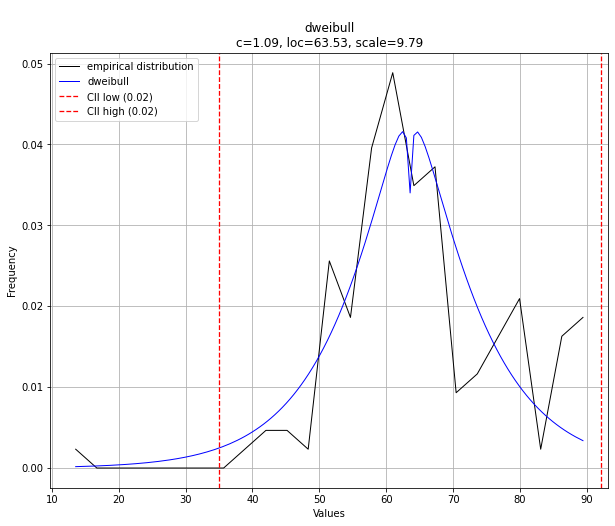

In [ ]:
dist1.plot(verbose=1)

In [ ]:
dist1.summary

,distr,score,LLE,loc,scale,arg
0,dweibull,0.545091,NaN,63.530053,9.793064,"(1.0925669785814853,)"


In [ ]:
dist1.generate(n=100)

[distfit] >Generate 100 dweibull distributed samples with fitted params (1.0925669785814853, 63.530053033192615, 9.793063774880903).


array([ 67.50634087,  62.79635233,  59.5351734 ,  64.80678627,
        36.53300532,  63.04856708,  72.64656467,  63.68673038,
        55.2845466 ,  60.00810979,  49.82834315,  -3.54623626,
        52.45525781,  54.80784402,  64.17204616,  63.65663842,
        73.02643904,  64.502356  ,  44.57710694,  84.77519831,
        67.71710462,  39.15718804,  65.22625524,  55.93386202,
        68.69866016,  68.42437624, 119.12777704,  56.72746911,
        68.04047736,  70.45768339,  48.71429797,  41.27225967,
        55.88575943,  84.96892889,  64.71416367,  50.65564746,
        50.55271165,  62.92873084,  46.95020409,  60.11550776,
        66.30560114,  64.19772573,  44.14718399,  56.19569859,
        92.54144462,  60.57336767,  47.97598825,  52.49940763,
        53.23400154,  78.18524457,  87.04943311,  64.84904348,
        75.93810412,  79.84770836,  67.35899   ,  64.47439568,
        96.13089439,  71.28203932,  54.71763503,  69.21206445,
        56.61619805,  47.78005114,  54.56300753,  35.00

In [ ]:
data_wbc = dist1.generate(n=100)
df['Сегментоядерные нейтрофилы (Segs)'] = data_wbc.tolist()
print(df)

[distfit] >Generate 100 dweibull distributed samples with fitted params (1.0925669785814853, 63.530053033192615, 9.793063774880903).
    Лейкоциты (WBC)  ...  Сегментоядерные нейтрофилы (Segs)
0          7.117894  ...                          74.730417
1          2.684016  ...                          67.832890
2          2.175805  ...                          51.506338
3         18.869148  ...                          64.783531
4         13.314418  ...                          50.043922
..              ...  ...                                ...
95         2.027713  ...                          67.587426
96        13.186083  ...                          78.663697
97         6.797947  ...                          61.005037
98        15.071305  ...                          65.020009
99         5.462288  ...                          57.333818

[100 rows x 5 columns]


Моноциты

In [ ]:
names = x_sick.columns
x_health_1 = x_sick['Моноциты (Mono)']
print(x_health_1)

# Initialize model
dist1 = distfit(bins=25,alpha=0.02,stats='ks', distr = 'dweibull')
print(x_health_1)
# Fit
dist1.fit_transform(x_health_1,verbose=1)
print(type(data1))

print(names)

0      11
1      17
2      10
3      13
4      12
       ..
131     4
132    10
133     6
134     7
135     5
Name: Моноциты (Mono), Length: 136, dtype: int64
0      11
1      17
2      10
3      13
4      12
       ..
131     4
132    10
133     6
134     7
135     5
Name: Моноциты (Mono), Length: 136, dtype: int64
<class 'numpy.ndarray'>
Index(['Гемоглобин (Hgb)', 'Эритроциты (RBC)', 'Лейкоциты (WBC)',
       'Палочкоядерные нейтрофилы (Bands)',
       'Сегментоядерные нейтрофилы (Segs)', 'Моноциты (Mono)',
       'Тромбоциты (Plt)', 'Средний объем эритроцита (MCV)'],
      dtype='object')


(<Figure size 720x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f72a394fe10>)

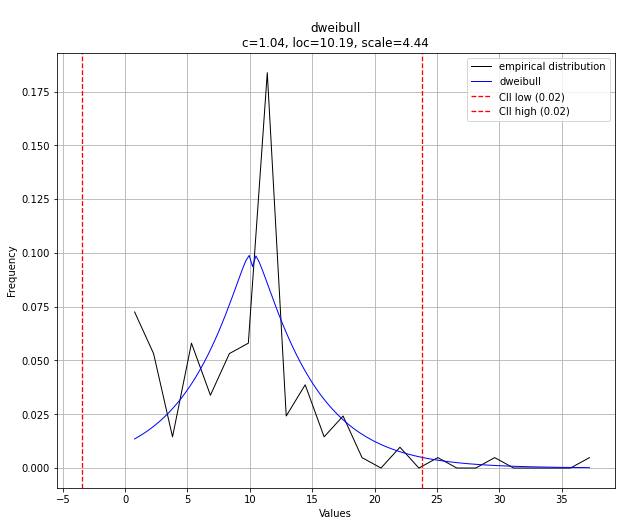

In [ ]:
dist1.plot(verbose=1)

In [ ]:
dist1.summary

,distr,score,LLE,loc,scale,arg
0,dweibull,0.807543,NaN,10.193972,4.44224,"(1.0421341070221777,)"


In [ ]:
dist1.generate(n=100)

[distfit] >Generate 100 dweibull distributed samples with fitted params (1.0421341070221777, 10.193972257368841, 4.442239804408381).


array([15.3741969 ,  7.93672053,  2.53530153, 11.7962573 , 11.81992692,
       10.29941158, -1.92443982,  9.28967121, 15.93111858, 17.16265931,
        6.38014796, 14.89142904, 10.52931041, 15.42722518, 10.57096495,
        6.12399359, 11.07075698,  8.65136969,  0.4968953 , 12.35244004,
       15.94743984,  2.80939123, 20.82452243,  8.55398595, 16.11480856,
       11.76755116,  3.87607401,  6.72942317,  4.20646251, 13.98622099,
        2.82226624, 10.16275977,  9.03056774, 18.30862361, 12.93177222,
       12.54655153, 10.91550655,  9.29208401,  8.5666093 , 16.49654998,
        8.78276492, 11.12821027,  2.22032145, 14.32683009, 17.50198013,
       12.62343343, 15.7553235 , 11.84455571,  7.32100707,  4.77562484,
       10.89839975,  2.06547325, 11.52456958, 24.06761614, 15.16087642,
       11.48665646,  8.33356234, 14.81370692,  6.4830491 ,  9.41857804,
       11.95516649, 13.54541002, 16.62396074, 11.55898135, 15.00013214,
        5.19781473,  8.83106599,  4.77541973, -0.74802849,  5.60

In [ ]:
data_wbc = dist1.generate(n=100)
df['Моноциты (Mono)'] = data_wbc.tolist()
print(df)

[distfit] >Generate 100 dweibull distributed samples with fitted params (1.0421341070221777, 10.193972257368841, 4.442239804408381).
    Лейкоциты (WBC)  ...  Моноциты (Mono)
0          7.117894  ...         0.377365
1          2.684016  ...        15.293328
2          2.175805  ...        11.662576
3         18.869148  ...         9.391970
4         13.314418  ...         6.629167
..              ...  ...              ...
95         2.027713  ...        23.958235
96        13.186083  ...        20.783984
97         6.797947  ...         6.681458
98        15.071305  ...        10.672383
99         5.462288  ...         5.878174

[100 rows x 6 columns]


Тромбоциты


In [ ]:
names = x_sick.columns
x_health_1 = x_sick['Тромбоциты (Plt)']
print(x_health_1)

# Initialize model
dist1 = distfit(bins=25,alpha=0.02,stats='ks', distr = 'lognorm')
print(x_health_1)
# Fit
dist1.fit_transform(x_health_1,verbose=1)
print(type(data1))

print(names)

0        2
1       18
2        2
3        2
4       11
      ... 
131     44
132     13
133    288
134     14
135     13
Name: Тромбоциты (Plt), Length: 136, dtype: int64
0        2
1       18
2        2
3        2
4       11
      ... 
131     44
132     13
133    288
134     14
135     13
Name: Тромбоциты (Plt), Length: 136, dtype: int64
<class 'numpy.ndarray'>
Index(['Гемоглобин (Hgb)', 'Эритроциты (RBC)', 'Лейкоциты (WBC)',
       'Палочкоядерные нейтрофилы (Bands)',
       'Сегментоядерные нейтрофилы (Segs)', 'Моноциты (Mono)',
       'Тромбоциты (Plt)', 'Средний объем эритроцита (MCV)'],
      dtype='object')


(<Figure size 720x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f72a6607ad0>)

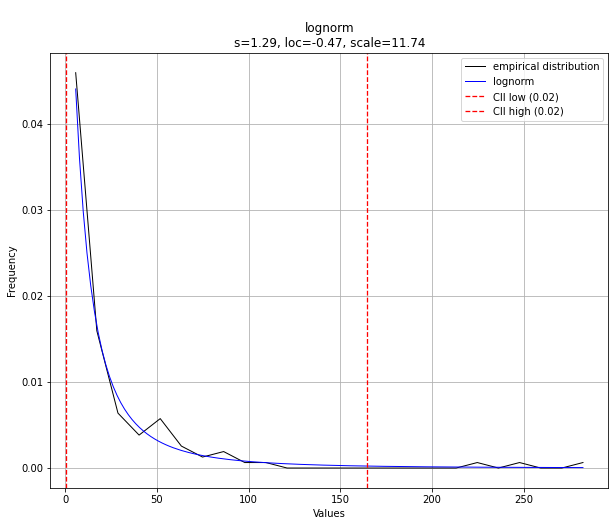

In [ ]:
dist1.plot(verbose=1)

In [ ]:
dist1.summary

,distr,score,LLE,loc,scale,arg
0,lognorm,2.250696,NaN,-0.473879,11.736053,"(1.2870378617706826,)"


In [ ]:
dist1.generate(n=100)

[distfit] >Generate 100 lognorm distributed samples with fitted params (1.2870378617706826, -0.4738788142626049, 11.736053262421407).


array([ 58.60226744,   1.42857231,   9.62819859,  14.27899689,
        43.12002255,   1.56003099,   3.67742962,  17.23528072,
        13.82073152,   1.95042535,  15.02440174, 124.79904937,
         4.29735307,  14.10532971,  30.82700096,  20.0022676 ,
        19.9665757 ,   8.88148919,   0.38334783,   1.37016373,
        29.74571524,   6.43151035,   4.08283626,   9.0718081 ,
        66.73885035,  50.79449496,  27.87767351,   4.47404115,
         5.63997175,  14.74320595,   0.64722619,  89.34255401,
        28.51501099,  17.74957107,  11.77848574,  11.59810944,
        30.82535287,   4.38623658,   5.61298145,   4.49885457,
        29.81641765,   0.31242296,  60.82377872,  27.58020208,
        34.54643858,  15.02130968,  31.35678754,  16.29044688,
        22.23613522,  46.66358688,  10.60334553,   2.89222706,
        15.18817793,  12.36540135,   5.74921234,   9.59197053,
        15.0061184 ,   3.02614313,  10.81035179,   1.92107222,
       181.60645955,   9.83439726,  21.5610264 ,   0.92

In [ ]:
data_wbc = dist1.generate(n=100)
df['Тромбоциты'] = data_wbc.tolist()
print(df)

[distfit] >Generate 100 lognorm distributed samples with fitted params (1.2870378617706826, -0.4738788142626049, 11.736053262421407).
    Лейкоциты (WBC)  Гемоглобин (Hgb)  ...  Моноциты (Mono)  Тромбоциты
0          7.117894        120.995047  ...         0.377365   45.409912
1          2.684016        120.027407  ...        15.293328   25.552028
2          2.175805        129.012750  ...        11.662576   38.690495
3         18.869148        103.128156  ...         9.391970   19.876451
4         13.314418        152.398369  ...         6.629167    4.501889
..              ...               ...  ...              ...         ...
95         2.027713        126.238902  ...        23.958235    0.116004
96        13.186083        112.478652  ...        20.783984    0.212675
97         6.797947        129.240835  ...         6.681458   11.295384
98        15.071305        107.008969  ...        10.672383   14.670474
99         5.462288        144.319728  ...         5.878174    0.506330

[

Средний объем эритроцита

In [ ]:
names = x_sick.columns
x_health_1 = x_sick['Средний объем эритроцита (MCV)']
print(x_health_1)

# Initialize model
dist1 = distfit(bins=25,alpha=0.02,stats='ks', distr = 'dweibull')
print(x_health_1)
# Fit
dist1.fit_transform(x_health_1,verbose=1)
print(type(data1))

print(names)

0      74.9
1      69.5
2      61.3
3      67.6
4      72.9
       ... 
131    74.0
132    64.5
133    65.0
134    68.6
135    66.7
Name: Средний объем эритроцита (MCV), Length: 136, dtype: float64
0      74.9
1      69.5
2      61.3
3      67.6
4      72.9
       ... 
131    74.0
132    64.5
133    65.0
134    68.6
135    66.7
Name: Средний объем эритроцита (MCV), Length: 136, dtype: float64
<class 'numpy.ndarray'>
Index(['Гемоглобин (Hgb)', 'Эритроциты (RBC)', 'Лейкоциты (WBC)',
       'Палочкоядерные нейтрофилы (Bands)',
       'Сегментоядерные нейтрофилы (Segs)', 'Моноциты (Mono)',
       'Тромбоциты (Plt)', 'Средний объем эритроцита (MCV)'],
      dtype='object')


(<Figure size 720x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fb931bb1090>)

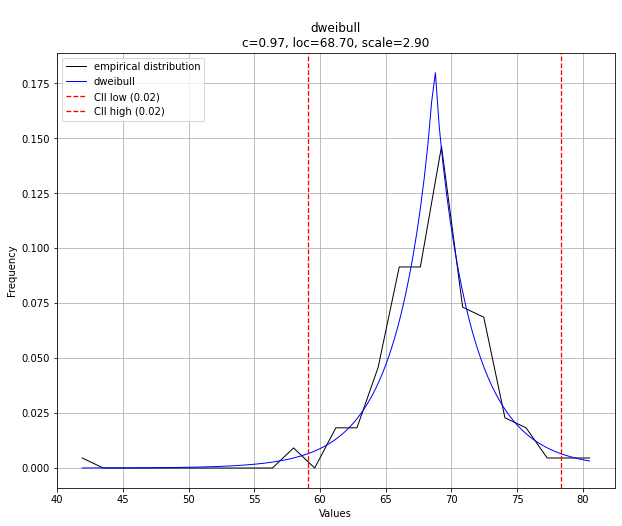

In [ ]:
dist1.plot(verbose=1)

In [ ]:
dist1.summary

,distr,score,LLE,loc,scale,arg
0,dweibull,1.448411,NaN,68.7,2.897139,"(0.973505264636795,)"


In [ ]:
dist1.generate(n=100)

[distfit] >Generate 100 dweibull distributed samples with fitted params (0.973505264636795, 68.69999999999999, 2.8971392441333776).


array([65.94483406, 70.44789646, 62.19736207, 69.20753738, 65.94437135,
       66.15568788, 68.49074776, 72.2330816 , 68.30686982, 67.45471052,
       65.85990652, 67.5530133 , 63.80526124, 64.99801554, 69.3984578 ,
       68.73950637, 70.42963055, 73.80733436, 67.68614131, 74.85903573,
       72.29913487, 72.60431547, 65.71335968, 68.66729515, 69.74689146,
       68.35233696, 66.924335  , 68.06579364, 69.63732728, 66.68198742,
       69.69022162, 69.23348281, 70.55687347, 70.84871195, 73.88925312,
       72.2475513 , 79.54782751, 75.55248514, 75.42031371, 69.27199008,
       60.55210708, 71.25496607, 60.90604107, 74.90317193, 66.87864901,
       68.8365789 , 70.81983675, 70.12014642, 67.29074337, 67.59725018,
       71.76669442, 68.89007581, 69.45736378, 69.07760322, 67.03093009,
       73.25857367, 68.28428464, 61.34759296, 65.96806535, 68.35154556,
       61.34040327, 70.02381186, 79.06235674, 68.01883664, 69.25222291,
       64.41671276, 68.87794929, 60.33080459, 68.38509918, 75.17

In [ ]:
data_wbc = dist1.generate(n=100)
df['Средний объем эритроцита (MCV)'] = data_wbc.tolist()
print(df)

[distfit] >Generate 100 dweibull distributed samples with fitted params (0.973505264636795, 68.69999999999999, 2.8971392441333776).
    Лейкоциты (WBC)  ...  Средний объем эритроцита (MCV)
0          7.117894  ...                       66.171606
1          2.684016  ...                       66.493373
2          2.175805  ...                       64.848656
3         18.869148  ...                       56.059705
4         13.314418  ...                       68.953227
..              ...  ...                             ...
95         2.027713  ...                       66.575617
96        13.186083  ...                       70.123786
97         6.797947  ...                       68.340322
98        15.071305  ...                       61.926917
99         5.462288  ...                       60.044230

[100 rows x 8 columns]


In [ ]:
df.to_excel("output.xlsx")  

Сама модель + проверка на ложноположиетльные, ложноотрицательные

In [ ]:
# посленяя версия
from sklearn import linear_model
from sklearn.utils import shuffle
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import VarianceThreshold

def Accurancy_pure(method, data):
  data_all_read = data
  data_all_read = pd.read_excel('data_312.xlsx')

  schedule_step = round((data_all_read.shape[0] - 1) / 2 / 10)
  sample_size = round((data_all_read.shape[0] - 1) / 2)
  print(sample_size)
  training_score = []
  test_score = []
  help_avarage_training = []
  help_avarage_test = []
  false_positive_array = []
  false_negative_array = []
  all_positive_test = 0
  all_negative_test = 0
  s = 0
  i = 0
  x = sample_size
  scaler = StandardScaler()
  x = sample_size % 10
  for i in range(schedule_step): 
    x += 10
    help_avarage_test = []
    help_avarage_training = []
    false_positive_array = []
    false_negative_array = []
    for j in range(150):
      data_all_read = shuffle(data_all_read)
      data_all = data_all_read
      data_all = shuffle(data_all)
      Y = data_all['Болен или нет']
      Y_training = Y[:x]
      Y_test = Y[x:x+x]
      data_all = data_all.drop(columns=['Болен или нет'])
      data_all = data_all.drop(columns=['Гемоглобин (Hgb)'])
      data_training = data_all[:x]
      sel = VarianceThreshold()
      data_training = sel.fit_transform(data_training)
      data_test = data_all[x:x+x]
      data_test = sel.fit_transform(data_test)

      clf_poly = method

      clf_poly.fit(data_training, Y_training)
      pred_poly = clf_poly.predict(data_training)
      new_pred_poly = []
      for j in pred_poly:
        if j <= 0.5:
          j = 0
        else: 
          j = 1
        new_pred_poly.append(j)
      scaler_poly = accuracy_score(Y_training, new_pred_poly)
      help_avarage_training.append(scaler_poly)

      pred_poly = clf_poly.predict(data_test)
      new_pred_poly = []
      for j in pred_poly:
        if j <= 0.5:
          j = 0
        else: 
          j = 1
        new_pred_poly.append(j)

      scaler_poly = accuracy_score(Y_test, new_pred_poly)
      help_avarage_test.append(scaler_poly)

      #начинаем проврку на ложно положительный/отрицательны
      false_positive = 0
      false_negative = 0
      Y_test = Y_test.tolist()
      for i in range(len(new_pred_poly)):
        if (new_pred_poly[i] == 1) and (Y_test[i] == 0):
          false_positive += 1
        if (new_pred_poly[i] == 0) and (Y_test[i] == 1):
          false_negative += 1
      false_positive_array.append(false_positive)
      false_negative_array.append(false_negative)

      #начинаем работать со всеми positive, negative для тестовой выборки
      if (int(x) == 150):
        all_positive_test += Y_test.count(1)
        all_negative_test += Y_test.count(0)

    s_training = sum(help_avarage_training)
    l_training = len(help_avarage_training)
    avarage_training = s_training / l_training
    training_score.append(avarage_training)

    s_test = sum(help_avarage_test)
    l_test = len(help_avarage_test)
    avarage_test = s_test / l_test
    test_score.append(avarage_test)

    # продолжение провекри на false_positive/negative
    s_false_positive = sum(false_positive_array)
    l_false_positive = len(false_positive_array)
    avarage_false_positive = s_false_positive / l_false_positive

    s_false_negative = sum(false_negative_array)
    l_false_negative = len(false_negative_array)
    avarage_false_negative = s_false_negative / l_false_negative

    print(training_score)
    print(test_score)
    print(len(Y_test))
    Y_array = []
  x = 0
  one_slice = len(Y_test) / len(test_score)
  l_test = len(test_score)
  for i in range(1, l_test+1):
    x = one_slice * i
    Y_array.append(x)
  # 1 когда бы 0 - ложноподожительный
  # 0 когда был 1 - ложноотрицательный
  #
  print('avarage_false_positive', avarage_false_positive)
  print('avarage_false_negative', avarage_false_negative)
  print('all_false_positive', s_false_positive)
  print('all_false_negative', s_false_negative)
  print('all_positive_test', all_positive_test)
  print('all_negative_test', all_negative_test)
  #print(Y_test.value_counts())
  print('l_positive', len(false_positive_array))
  print('l_negative', len(false_negative_array))
  print('poly', len(new_pred_poly))
  print(len(help_avarage_test))
  plt.plot(Y_array, test_score)
  plt.ylabel('score')
  plt.xlabel('dogs')
  plt.title('Dependence of accurancy on quantity')


Начинаем проверять и писать документацию

In [ ]:
# посленяя версия
from sklearn import linear_model
from sklearn.utils import shuffle
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import VarianceThreshold

def Accurancy_pure(method, data):
  data_all_read = data

  schedule_step = round((data_all_read.shape[0] - 1) / 2 / 10)  # шаг для количества собак на графике (условно сколько выборок с разнымколиеством собак у нас будет)
  sample_size = round((data_all_read.shape[0] - 1) / 2) # размер тестовой и тренеровочной выборок
  print(sample_size)
  training_score = []
  test_score = []
  help_avarage_training = [] # можно убрать, позже прописан
  help_avarage_test = [] # можно убрать, позже прописан
  false_positive_array = [] # можно убрать, позже прописан
  false_negative_array = [] # можно убрать, позже прописан
  all_positive_test = 0
  all_negative_test = 0
  s = 0
  i = 0
  x = sample_size
  scaler = StandardScaler()
  x = sample_size % 10 #т.к. по 10 собак будем добавлять в выобку (это эе график зависимсоти качества от количества собак в выборке)
  for i in range(schedule_step): 
    x += 10
    help_avarage_test = []
    help_avarage_training = []
    false_positive_array = []
    false_negative_array = []
    for j in range(150): # чтобы результат получилс более стабильным и следовательно точным, будем смотреть среднюю точнсть на 150 запусков
      data_all_read = shuffle(data_all_read) # перемешиваем данные, чтобы получились новые выборки
      data_all = data_all_read
      data_all = shuffle(data_all) # опять перемешиваем на всякий случай, думаю можно удалить
      Y = data_all['Болен или нет']
      Y_training = Y[:x]
      Y_test = Y[x:x+x] #т.к. обучающая и тестовя выборки равны, то x + x
      data_all = data_all.drop(columns=['Болен или нет'])
      data_all = data_all.drop(columns=['Гемоглобин (Hgb)'])
      data_training = data_all[:x]
      sel = VarianceThreshold() # по идее удаляет фичи с маленькой дисперсией, но здесь пооже, что ничего не меняет, но оставляют т.к. нравится 
      data_training = sel.fit_transform(data_training)
      data_test = data_all[x:x+x]
      data_test = sel.fit_transform(data_test)

      clf_poly = method

      clf_poly.fit(data_training, Y_training) #фитим тренировачные данные
      pred_poly = clf_poly.predict(data_training)
      new_pred_poly = [] # хранит округлённые предсказания
      for j in pred_poly: # механизм округления предсказаний строго в 0 или 1
        if j <= 0.5:
          j = 0
        else: 
          j = 1
        new_pred_poly.append(j)
      scaler_poly = accuracy_score(Y_training, new_pred_poly) #считаем эккьюраси 
      help_avarage_training.append(scaler_poly) #массив содержащий значения точности(эккьраси для дальшейго подсчёта средней точности на 150 запусков)

      pred_poly = clf_poly.predict(data_test) #предиктим тест
      new_pred_poly = [] #обнуляем для хранения новых значений предсказаний
      for j in pred_poly:
        if j <= 0.5:
          j = 0
        else: 
          j = 1
        new_pred_poly.append(j)

      scaler_poly = accuracy_score(Y_test, new_pred_poly) #точность теста
      help_avarage_test.append(scaler_poly) # массив для средней точности на 150 запусков

      #начинаем проврку на ложно положительный/отрицательны
      false_positive = 0 #ложноположительный
      false_negative = 0 #ложноотрицательный
      Y_test = Y_test.tolist() # переводим Series в list, чтобы сравнивать с предсказаниями
      for i in range(len(new_pred_poly)):
        if (new_pred_poly[i] == 1) and (Y_test[i] == 0): #если собака здорова, а по предсказанию больна
          false_positive += 1
        if (new_pred_poly[i] == 0) and (Y_test[i] == 1): #если на самом деле больна а по предсказанию здорова
          false_negative += 1
      false_positive_array.append(false_positive)
      false_negative_array.append(false_negative)

      #начинаем работать со всеми positive, negative для тестовой выборки
      if (int(x) == 150): # когда дмаксимального значения в выборке (150) не путать с количество запусков, хотя здесь оно т же самое
        all_positive_test += Y_test.count(1) #колиечство больных собак на тестовую выборку
        all_negative_test += Y_test.count(0) #количество здоровых собак на тестовыую выборку
    #возвращаемся в трейну
    s_training = sum(help_avarage_training) #сумма всех скоров на n собак за 150 запусокв
    l_training = len(help_avarage_training) #количество всех скоров на n собак за 150 запусокв
    avarage_training = s_training / l_training #среднее значение всех скоров на n собак за 150 запусокв
    training_score.append(avarage_training)
    #то же самое, но для теста
    s_test = sum(help_avarage_test)
    l_test = len(help_avarage_test)
    avarage_test = s_test / l_test
    test_score.append(avarage_test)

    # продолжение провекри на false_positive/negative
    s_false_positive = sum(false_positive_array) # сумма ложноположительных результатов модели за 150 запусков на n собак
    l_false_positive = len(false_positive_array) #количество ложноотрицательных результатов модели
    avarage_false_positive = s_false_positive / l_false_positive #среднеезначениеложноположительных значений модели
    # то же самое, но для ложноотрицательных
    s_false_negative = sum(false_negative_array)
    l_false_negative = len(false_negative_array)
    avarage_false_negative = s_false_negative / l_false_negative

    print(training_score)
    print(test_score)
    print(len(Y_test))
    Y_array = []
  x = 0
  one_slice = len(Y_test) / len(test_score) #количество зупосков(150) разделённое на количество запусов с шагом, это даёт нам шаг для графика, в данном случае это и есть x
  l_test = len(test_score)
  for i in range(1, l_test+1): # даёт массив состоящий из значений количетств собак при разном шаге (нужно для графика)
    x = one_slice * i
    Y_array.append(x)
  # 1 когда был 0 - ложноподожительный
  # 0 когда был 1 - ложноотрицательный
  #
  print('avarage_false_positive', avarage_false_positive) #среднее количество ложно положительных на 150 собак (последний шаг) за 150 запусков
  print('avarage_false_negative', avarage_false_negative)
  print('all_false_positive', s_false_positive)
  print('all_false_negative', s_false_negative)
  print('all_positive_test', all_positive_test)
  print('all_negative_test', all_negative_test)
  #print(Y_test.value_counts())
  print('l_positive', len(false_positive_array))
  print(len(help_avarage_test))
  #начинаем строить график
  plt.plot(Y_array, test_score) #по оси x количество собак, по y точность(score) на них
  plt.ylabel('score')
  plt.xlabel('dogs')
  plt.title('Dependence of accurancy on quantity')


150
[0.9986666666666667]
[0.8246666666666677]
10
[0.9986666666666667, 0.9810000000000006]
[0.8246666666666677, 0.9006666666666672]
20
[0.9986666666666667, 0.9810000000000006, 0.9748888888888897]
[0.8246666666666677, 0.9006666666666672, 0.91688888888889]
30
[0.9986666666666667, 0.9810000000000006, 0.9748888888888897, 0.9654999999999991]
[0.8246666666666677, 0.9006666666666672, 0.91688888888889, 0.9310000000000004]
40
[0.9986666666666667, 0.9810000000000006, 0.9748888888888897, 0.9654999999999991, 0.9622666666666657]
[0.8246666666666677, 0.9006666666666672, 0.91688888888889, 0.9310000000000004, 0.9363999999999993]
50
[0.9986666666666667, 0.9810000000000006, 0.9748888888888897, 0.9654999999999991, 0.9622666666666657, 0.955444444444445]
[0.8246666666666677, 0.9006666666666672, 0.91688888888889, 0.9310000000000004, 0.9363999999999993, 0.9317777777777786]
60
[0.9986666666666667, 0.9810000000000006, 0.9748888888888897, 0.9654999999999991, 0.9622666666666657, 0.955444444444445, 0.9560952380952

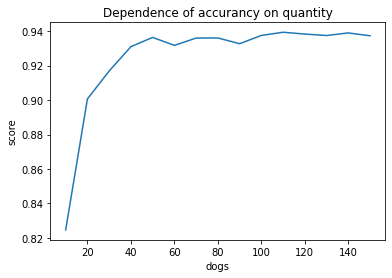

In [ ]:
data_all_read = pd.read_excel('data_312.xlsx')
Accurancy_pure(linear_model.LinearRegression(), data_all_read)